# Scientific Exploration of Telecom Churn Analysis

## Table of Contents
1. Problem Statement
2. Objective
3. Installing & Importing Libraries
4. Data Acquisition & Description
5. Data Profiling
6. Exploratory Data Analysis
7. Conclusion
8. Insights

## 1. Problem Statement
The dataset contains information about telecom customers, including their account details, usage patterns, and whether they churned (left) or not. The goal is to analyze this data to understand the factors that influence customer churn and develop strategies to reduce churn rates.

## 2. Objective
- **Data Understanding**: Explore the dataset, including the distribution of numerical and categorical features, the presence of missing data, and the identification of duplicate rows.

- **Descriptive Analysis**: Perform a descriptive analysis of key features such as account length, area code, international plan, voice mail plan, and customer service calls. Calculate summary statistics and identify any patterns or trends.

- **Correlation Analysis**: Investigate correlations between features, with a focus on identifying highly correlated variables that may provide redundant information.

- **Churn Analysis**: Analyze the churn rate, identify how many customers churned, and calculate the churn percentage. Investigate the relationship between churn and various factors, including international plan usage, voice mail plan usage, and area codes.

- **Usage Patterns**: Explore customer usage patterns for features such as total day minutes, day calls, and day charge. Identify quartiles and percentiles to understand the distribution of these features.

## 3. Installing & Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 4. Data Acquisition & Description

- State : All 51 states

- Account Length : How long account has been active

- Area Code : Code Number of Area

- lntl Plan : International plan activated ( yes, no )

- VMail Plan : Voice Mail plan activated ( yes ,no )

- VMail Message : No.of voice mail messages

- Day Mins : Total day minutes used

- Day calls : Total day calls made

- Day Charge : Total day charge

- Eve Mins : Total evening minutes

- Eve Calls : Total evening calls

- Eve Charge : Total evening charge

- Night Mins : Total night minutes

- Night Calls : Total night calls

- Night Charge : Total night charge

- Intl Mins : Total International minutes used

- Intl Calls : Total International calls made

- Intl Charge : Total International charge

- CustServ calls : Number of customer service calls made

- Churn : Customer churn (Target Variable True=1, False=0)

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/GitHub_Project/Telecom_Churn_Analysis/Telecom_Churn.csv'
data = pd.read_csv(path)
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
data[data.duplicated(keep=False)]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn


## 4.1 Data Description
In this section we will get information about the data and see some observations.

In [ ]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


###Observations:

- On average customers perform 8 number of email messages.

- 50% of customers don't do any email messages while 75% of customers do 20 number of messages.

- On average customers talk 180 minutes during day time.

- 25% of customers talk 144 minutes of duration in the day while 50% and 75% of customers talk 179 minutes and 216 minutes in day.

- On average customers like to perform 100 day calls.

- 25% of customers like to perform 87 number of day calls while 50% and 75% of customers like to perform 101 and 114 number of day calls.

- On average it take 30 cents for day services.

- 25% of customers have been charged with 24 cents while 50% and 75% of customers have been charged with 30 cents and 36 cents in the day.

- Similarly users can understand the information for rest of the features.

## 4.2 Data Information
In this section we will see the information about the types of features.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

## 5. Data Profiling
For quick analysis pandas profiling is very handy.

Generates profile reports from a pandas DataFrame.

For each column statistics are presented in an interactive HTML report.

In [ ]:
!pip install -q pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 74.5 MB/s eta 0:00:00


In [ ]:
from pandas_profiling import ProfileReport

<ipython-input-10-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
profile = ProfileReport(df=data)
profile.to_file('Profiling Report.html')
print('Accomplished !')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished !


### Observations:

Report show that there are total 20 features out of which 15 are numerical, 3 are boolean and 2 are categorical.

0 (0.0%) cells contains missing information.

Data contains 0 (0.0%) duplicate rows.

Total day minutes is highly overall correlated with Total day charge.

Total eve minutes is highly overall correlated with Total eve charge.

Total night charge is highly overall correlated with Total night minutes.

Total intl charge is highly overall correlated with Total intl minutes.

## 6. Exploratory Data Analysis

### 6.1 Frequency & Proportion of Churned Customers

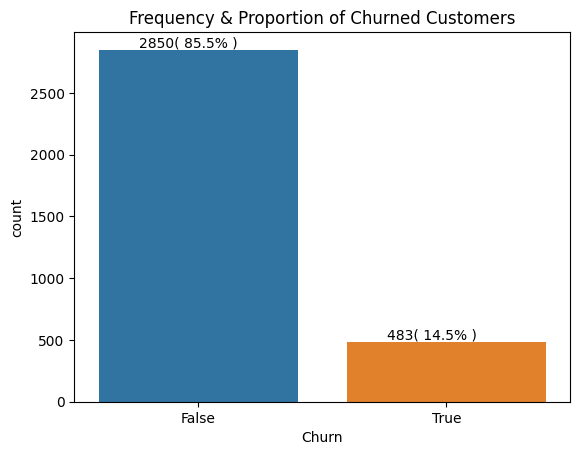

In [44]:
ax = sns.countplot(data=data, x = 'Churn')
for p in ax.patches:
    total = data.shape[0]
    percentage = '{:.0f}'.format(p.get_height()) +'( ' + '{:.1f}%'.format(100*p.get_height() / total) +' )'
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height() + 20
    ax.annotate(percentage,(x,y))
plt.title('Frequency & Proportion of Churned Customers')
plt.show()

#### Observations:

The churn percentage is 14.5%.

Approximately 483 people churned out of 3333 people.

### 6.2 Frequency & Proportion of International Plan

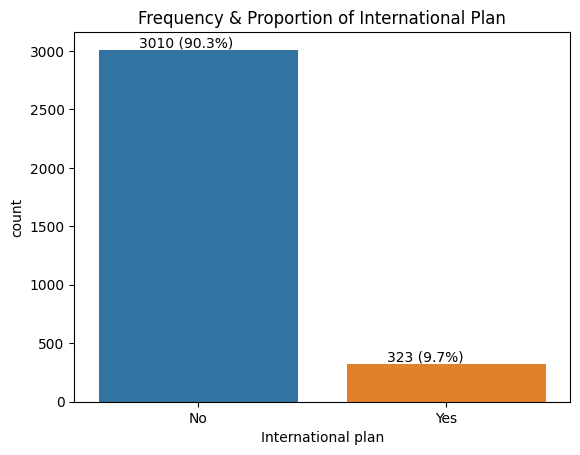

In [47]:
ax = sns.countplot(data=data, x= 'International plan')
for p in ax.patches:
    total = data.shape[0]
    percentage = '{:.0f}'.format(p.get_height()) +' (' + '{:.1f}%'.format(100*p.get_height()/total) + ')'
    x = p.get_x() + p.get_width() / 5
    y = p.get_y() + p.get_height() + 20
    ax.annotate(percentage,(x,y))
plt.title('Frequency & Proportion of International Plan')
plt.show()

#### Observation:

3010 (around 90%) of customers are not using international plan while only 323 (around 10%) are using international plan.

### 6.3 Frequency Distribution of International Plan with respect to Churn

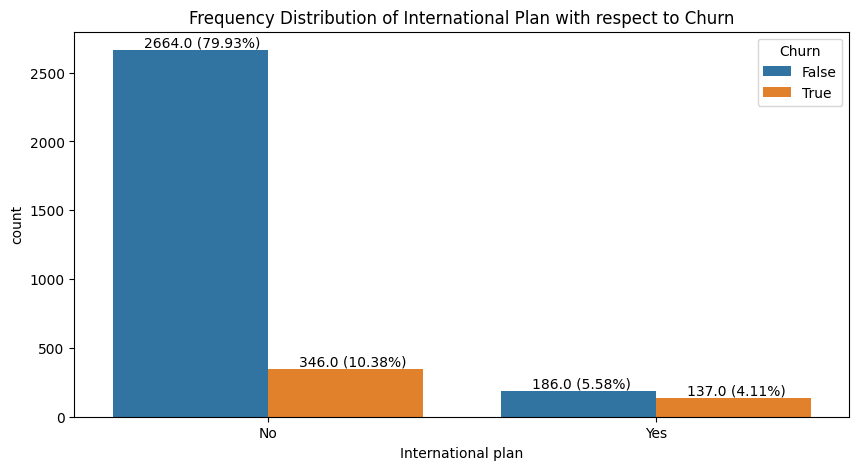

In [32]:
figure = plt.figure(figsize=[10,5])
ax = sns.countplot(data=data, x= 'International plan',hue='Churn')
for p in ax.patches:
    total = data.shape[0]
    percentage = '{}'.format(p.get_height()) +' (' + '{:.2f}%'.format(100*p.get_height()/total) + ')'
    x = p.get_x() + p.get_width() / 5
    y = p.get_y() + p.get_height() + 20
    ax.annotate(percentage,(x,y))
plt.title('Frequency Distribution of International Plan with respect to Churn')
plt.show()

#### Observation:

- Customers who don't have international plan:

 - Un-churned customers are approx 7.5X than churned customers.
- Customers who have international plan:

 - Un-churned customers are approx 1.4% more than churned customers.

### 6.4 Frequency & Proportion of Voice mail plan

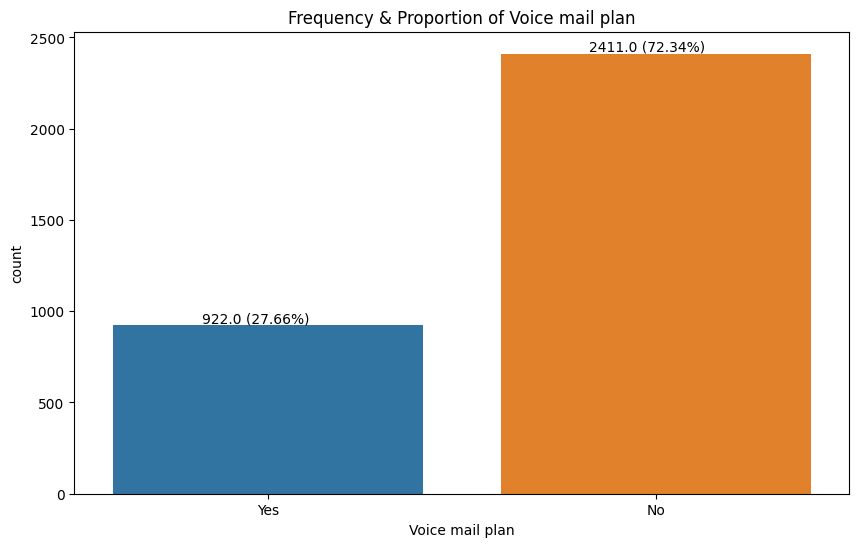

In [35]:
figure = plt.figure(figsize=[10,6])
ax = sns.countplot(data=data, x = 'Voice mail plan')
for p in ax.patches:
    total = data.shape[0]
    percentage = '{}'.format(p.get_height()) + ' (' +'{:.2f}%'.format(100*p.get_height()/total) + ')'
    x = p.get_x() + p.get_width()/3.5
    y = p.get_y() + p.get_height() + 16
    ax.annotate(percentage,(x,y))
plt.title('Frequency & Proportion of Voice mail plan')
plt.show()

####Observation:

2411 (around 72%) of customers are not using voice mail plan while only 922 (around 28%) are using voice mail plan.

### 6.5 Frequency Distribution of Voice mail plan with respect to Churn

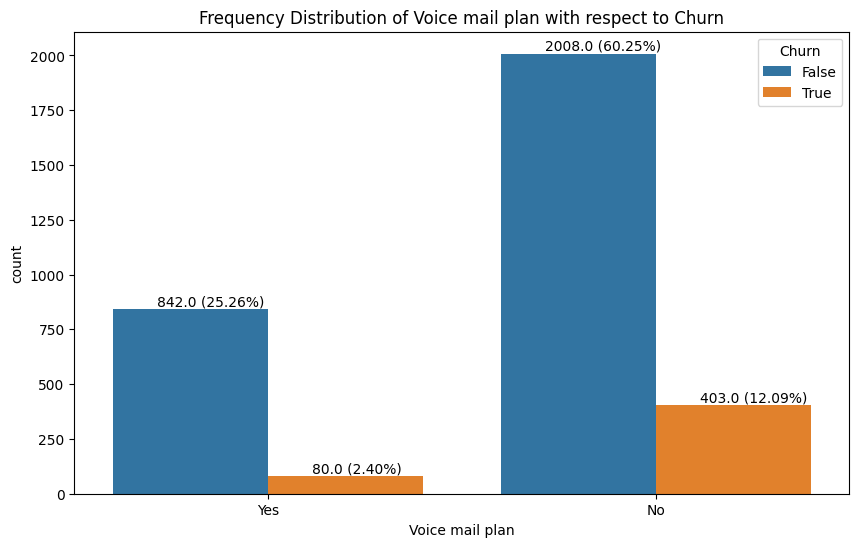

In [37]:
figure = plt.figure(figsize=[10,6])
ax = sns.countplot(data=data, x = 'Voice mail plan',hue='Churn')
for p in ax.patches:
    total = data.shape[0]
    percentage = '{}'.format(p.get_height()) + ' (' +'{:.2f}%'.format(100*p.get_height()/total) + ')'
    x = p.get_x() + p.get_width()/3.5
    y = p.get_y() + p.get_height() + 16
    ax.annotate(percentage,(x,y))
plt.title('Frequency Distribution of Voice mail plan with respect to Churn')
plt.show()

####Observation:

- Customers who have voicemail plan:

 - Un-churned customers are approx 10.5X than churned customers.
- Customers who don't have voicemail plan:

 - Un-churned customers are approx 5X more than churned customers.

### 6.6 Frequency & Proportion of Area Code

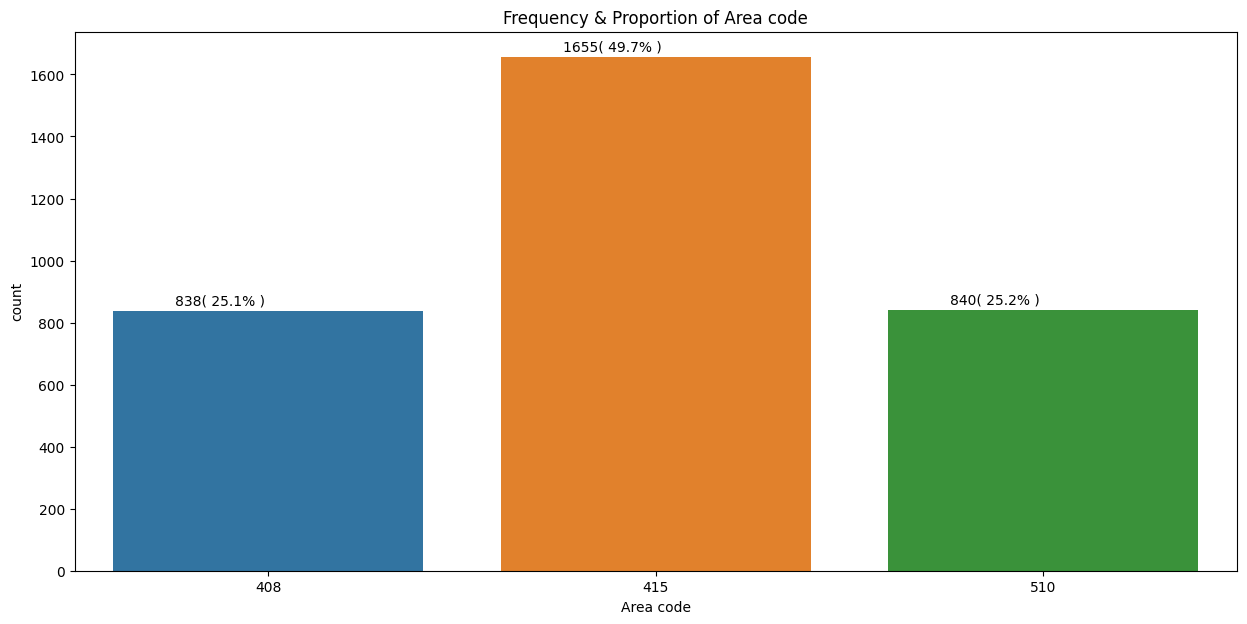

In [48]:
figure = plt.figure(figsize=[15,7])
ax = sns.countplot(data=data,x='Area code')
for p in ax.patches:
    total = data.shape[0]
    percentage = '{:.0f}'.format(p.get_height()) +'( ' +'{:.1f}%'.format(100*p.get_height() / total) + ' )'
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height() + 20
    ax.annotate(percentage,(x,y))
plt.title('Frequency & Proportion of Area code')
plt.show()

####Observation:

838 (25.1%) of customers belong to area code 408.

1655 (49.7%) of customers belongs to area code 415.

840 (25.2%) of customers belongs to area code 510.

On observing above three points, we can say that majority of customers belongs to area code 415.

### 6.7 Frequency Distribution of Area code with respect to Churn

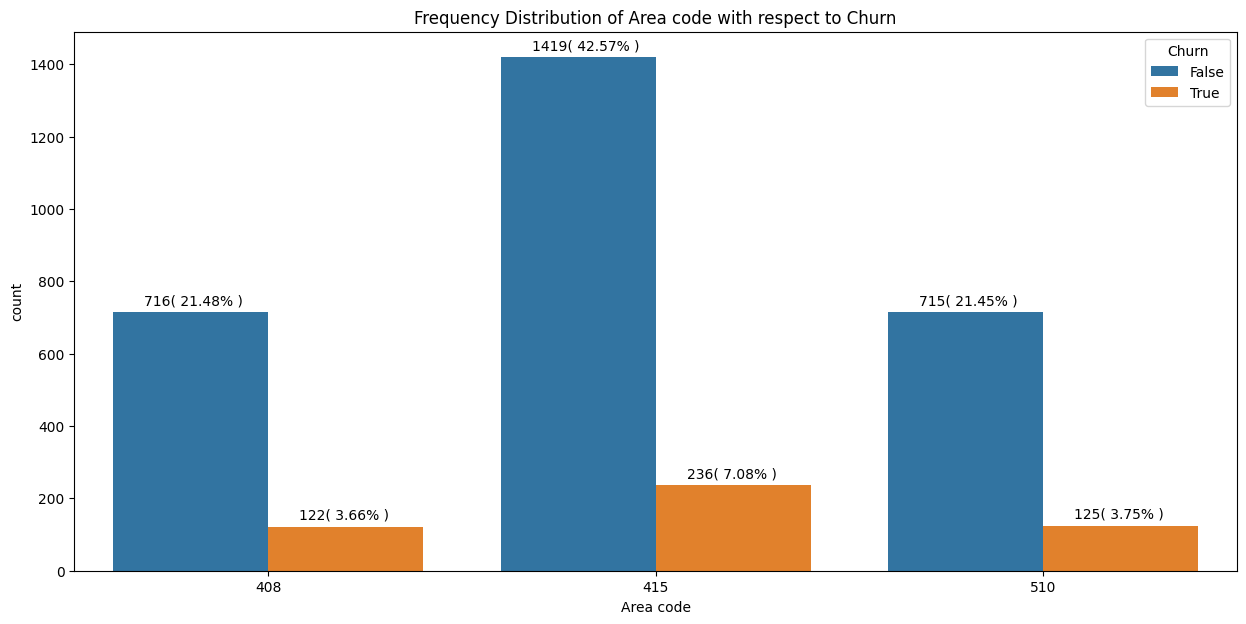

In [39]:
figure = plt.figure(figsize=[15,7])
ax = sns.countplot(data=data,x='Area code',hue='Churn')
for p in ax.patches:
    total = data.shape[0]
    percentage = '{:.0f}'.format(p.get_height()) +'( ' +'{:.2f}%'.format(100*p.get_height() / total) + ' )'
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height() + 20
    ax.annotate(percentage,(x,y))
plt.title('Frequency Distribution of Area code with respect to Churn')
plt.show()

####Observation:

- Customers who belongs to area code 408:

 - Un-churned customers are approx 6X than churned customers.
- Customers who belongs to area code 415:

 - Un-churned customers are approx 6X more than churned customers.
- Customers who belongs to area code 510:

 - Un-churned customers are approx 5.5X more than churned customers.

### 6.8 Frequency Distribution of State with respect to Churn

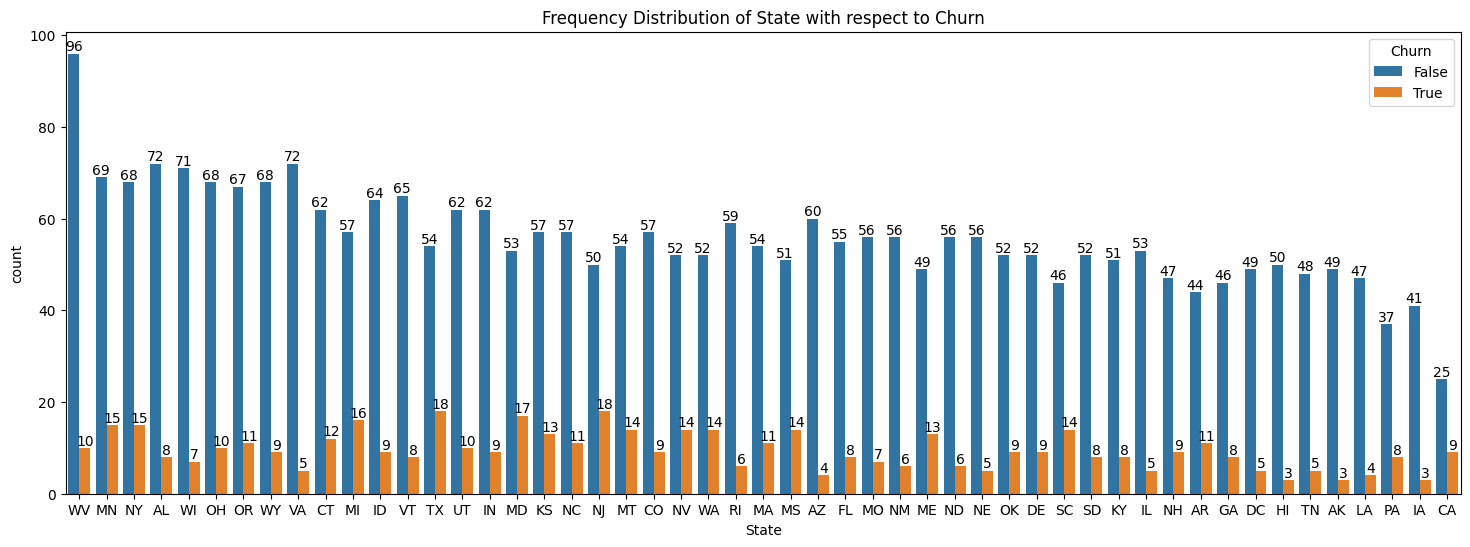

In [40]:
figure = plt.figure(figsize=[18,6])
a = data['State'].value_counts()
b = a.index.tolist()
y = sns.countplot(data=data,x='State', order = b,hue='Churn')
for bars in y.containers:
    y.bar_label(bars)
plt.title('Frequency Distribution of State with respect to Churn')
plt.show()

### 6.9 Frequency Distribution of Customer service calls with respect to Churn

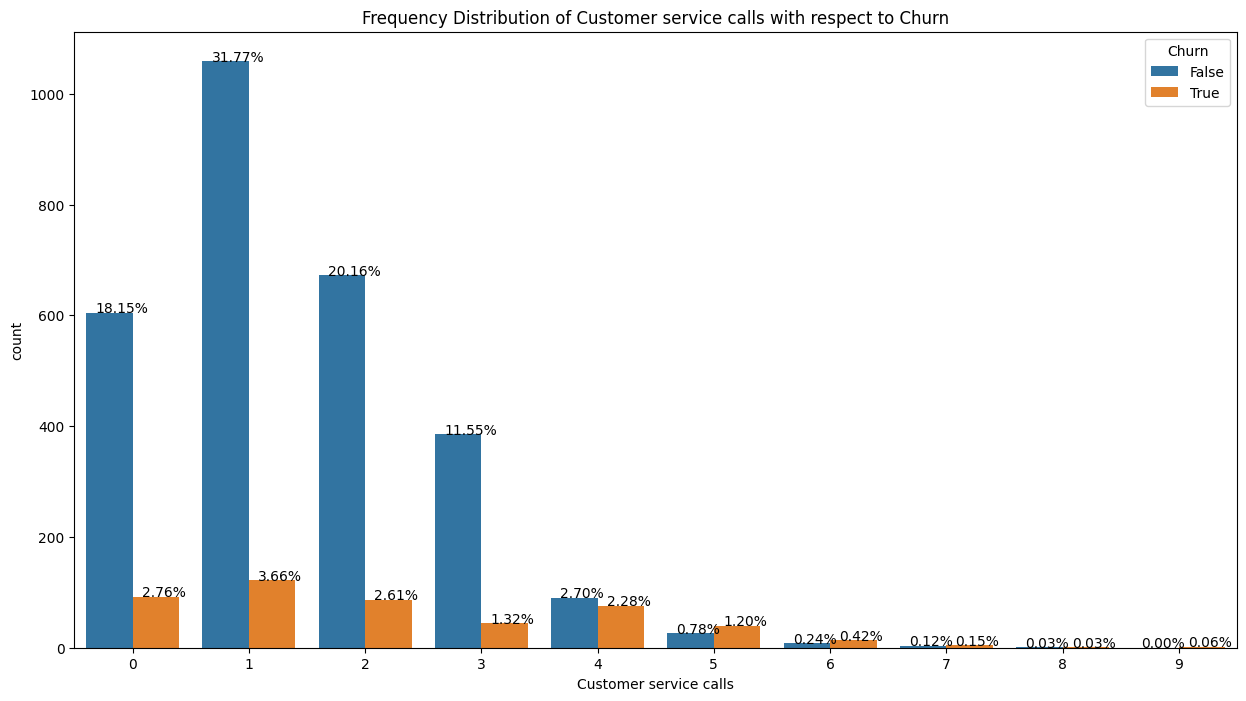

In [43]:
figure = plt.figure(figsize=[15,8])
ax = sns.countplot(data=data,x= 'Customer service calls',hue='Churn')
for p in ax.patches:
    total = data.shape[0]
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y))
plt.title('Frequency Distribution of Customer service calls with respect to Churn')
plt.show()

#### Observation:
- When there are no calls, un-churned customers are approximately 6.5 times more numerous than churned customers.
- With one call, un-churned customers outnumber churned customers by approximately 9 times.
- Having received two calls, un-churned customers are approximately 7.5 times more numerous than churned customers.
- If there are three calls, un-churned customers still outnumber churned customers by approximately 9 times.
- When there are four calls, un-churned customers are only about 0.42% more numerous than churned customers.
- With five calls, un-churned customers become approximately 1.5 times less numerous than churned customers.
- With six calls, un-churned customers are approximately 1.75 times less numerous than churned customers.
- When seven calls are received, un-churned customers are just about 0.03% less numerous than churned customers.
- When there are eight calls, un-churned customers are equal in number to churned customers.
- With nine calls, un-churned customers are approximately 0.06% less numerous than churned customers.

<ipython-input-51-0d7e838b4ebf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(),annot=True)


<Axes: >

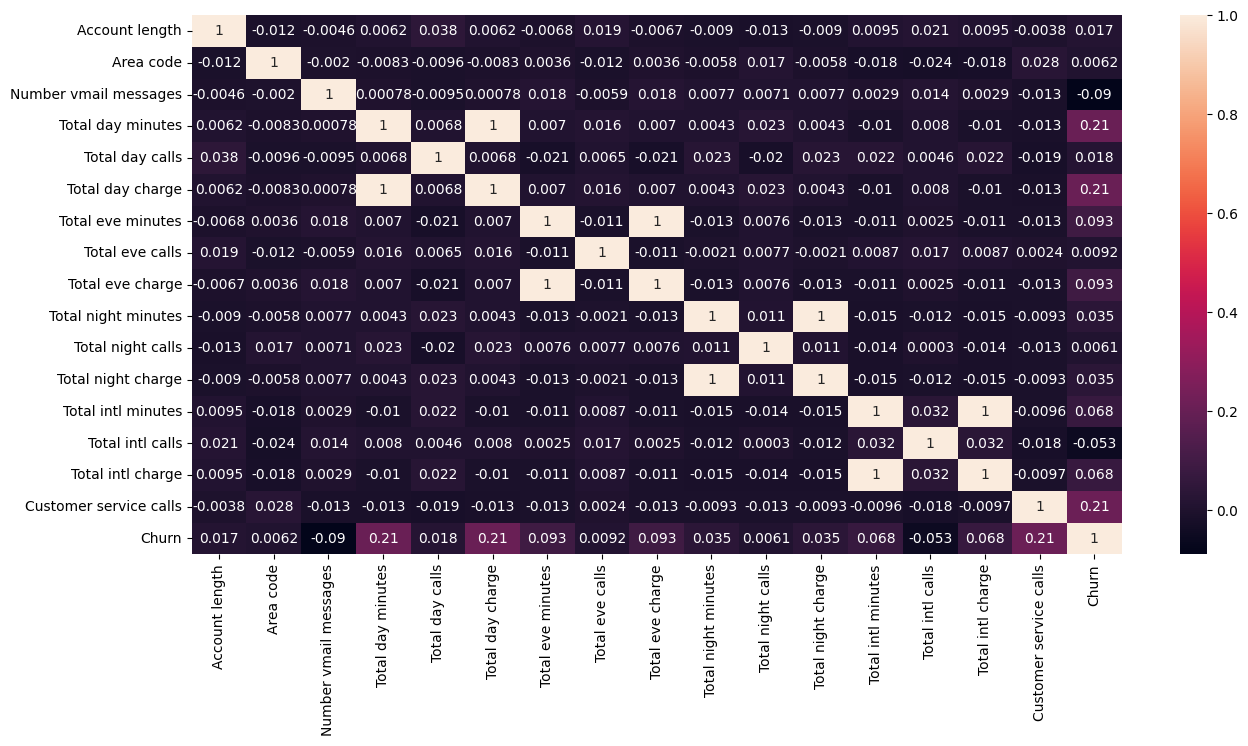

In [51]:
figure= plt.figure(figsize=[15,7])
sns.heatmap(data=data.corr(),annot=True)

### 7. Conclusion

- Key findings include strong correlations between variables like total day minutes and total day charge, total eve minutes and total eve charge, total night minutes and total night charge, and total international minutes and total international charge.
- The overall churn rate is 14.5%, with approximately 483 customers out of 3333 churning.
- The majority of customers (90%) do not use international plans, while only 10% use international plans. For those without international plans, un-churned customers outnumber churned customers by approximately 7.5 times, while for those with international plans, un-churned customers are approximately 1.4% more numerous.
- Most customers (72%) do not use voice mail plans, while 28% use voice mail plans. For those with voice mail plans, un-churned customers outnumber churned customers by approximately 10.5 times, while for those without voice mail plans, un-churned customers are approximately 5 times more numerous.
- The majority of customers belong to area code 415, with area codes 408 and 510 also represented. Un-churned customers outnumber churned customers in all three area codes, with area code 415 having the highest un-churned-to-churned customer ratio.
- Analysis of customer call patterns shows that the number of calls has an impact on churn. For example, when there are no calls, un-churned customers are approximately 6.5 times more numerous than churned customers, while with one call, un-churned customers outnumber churned customers by approximately 9 times. This trend continues with varying call counts.

### 8. Insights

- **Churn Rate**: The churn rate is a critical metric, and it stands at 14.5%. This means that approximately 14.5% of the customers in the dataset have left the telecom service. Reducing this churn rate could significantly impact the company's revenue and profitability.

- **International Plan**: The majority of customers (90%) do not use international plans. It's interesting to note that un-churned customers significantly outnumber churned customers among those without international plans. However, the company might want to explore why some customers with international plans are churning, as they form a small but valuable segment.

- **Voice Mail Plan**: Most customers (72%) do not use voice mail plans. Similar to international plans, un-churned customers significantly outnumber churned customers among those without voice mail plans. The company should investigate why some customers with voice mail plans are churning.

- **Area Codes**: Area code 415 has the highest representation among customers, followed by area codes 408 and 510. Regardless of the area code, un-churned customers outnumber churned customers, indicating that geographic location alone may not be a strong predictor of churn.

- **Usage Patterns**: There are interesting patterns in customer usage, such as the number of calls and total minutes used. For example, the analysis reveals that customers with fewer calls are more likely to churn. This suggests that customer engagement and usage intensity may play a role in churn prediction.

- **Correlations**: Strong correlations between variables like total day minutes and total day charge, as well as other pairs of features, suggest that these features may provide redundant information. When building predictive models, it's important to consider these correlations to avoid multicollinearity.

- **Quartiles and Percentiles**: Understanding quartiles and percentiles for usage-related features like day minutes and day calls can help the company set benchmarks and identify potential outliers or anomalies in customer behavior.

- **Comparative Analysis**: Comparative analysis between churned and un-churned customers for various features can reveal differences in behavior and preferences. These insights can inform targeted marketing or retention strategies.

Overall, the data provides valuable insights into customer behavior and churn patterns. To reduce churn and improve customer retention, the telecom company can use these insights to develop tailored strategies, such as offering incentives to customers with high churn risk or enhancing customer engagement for specific segments. Further advanced analytics and predictive modeling can be applied to build churn prediction models for proactive retention efforts.